In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, load_img
import matplotlib.pyplot as plt
import string

In [ ]:
# Load the dataset
train_data = pd.read_csv('sign_mnist_train.csv')
test_data = pd.read_csv('sign_mnist_test.csv')


In [ ]:
X_train, y_train = np.array(train_data.iloc[:, 1:]).reshape(-1, 28, 28).astype('float64'), np.array(train_data.label).astype('float64')
X_test, y_test = np.array(test_data.iloc[:, 1:]).reshape(-1, 28, 28).astype('float64'), np.array(test_data.label).astype('float64')

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(27455, 28, 28) (27455,)
(7172, 28, 28) (7172,)


In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2)

train_generator = train_datagen.flow(x=np.expand_dims(X_train, axis=-1), y=y_train,
                  batch_size=32)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow(x=np.expand_dims(X_test, axis=-1), y=y_test,
                  batch_size=32)

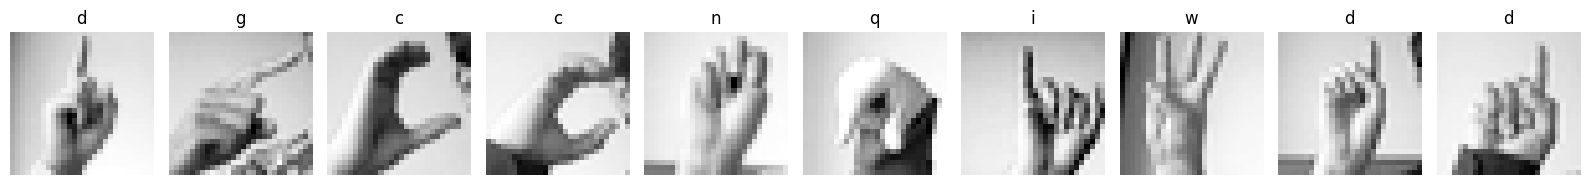

In [ ]:
def plot_categories(training_images, training_labels):
  fig, axes = plt.subplots(1, 10, figsize=(16, 15))
  axes = axes.flatten()
  letters = list(string.ascii_lowercase)

  for k in range(10):
    img = training_images[k]
    img = np.expand_dims(img, axis=-1)
    img = array_to_img(img)
    ax = axes[k]
    ax.imshow(img, cmap="Greys_r")
    ax.set_title(f"{letters[int(training_labels[k])]}")
    ax.set_axis_off()

  plt.tight_layout()
  plt.show()

plot_categories(X_train, y_train)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

tf.random.set_seed(1234)

model = tf.keras.Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(25, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         205,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 25)                  │           6,425 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 216,281 (844.85 KB)

 Trainable params: 216,281 (844.85 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_generator, validation_data=test_generator, epochs=15)


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


858/858 ━━━━━━━━━━━━━━━━━━━━ 47s 51ms/step - accuracy: 0.1552 - loss: 2.8257 - val_accuracy: 0.6082 - val_loss: 1.2121
Epoch 2/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 44s 51ms/step - accuracy: 0.5368 - loss: 1.4453 - val_accuracy: 0.6935 - val_loss: 0.8305
Epoch 3/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 45s 52ms/step - accuracy: 0.6718 - loss: 0.9915 - val_accuracy: 0.8698 - val_loss: 0.3964
Epoch 4/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 77s 46ms/step - accuracy: 0.7485 - loss: 0.7546 - val_accuracy: 0.8915 - val_loss: 0.3192
Epoch 5/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - accuracy: 0.7896 - loss: 0.6329 - val_accuracy: 0.9251 - val_loss: 0.2383
Epoch 6/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 37s 43ms/step - accuracy: 0.8212 - loss: 0.5409 - val_accuracy: 0.9578 - val_loss: 0.1622
Epoch 7/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 48s 51ms/step - accuracy: 0.8420 - loss: 0.4661 - val_accuracy: 0.9564 - val_loss: 0.1517
Epoch 8/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 47s 55ms/step - accuracy: 0.8590 - loss: 0.4190 - val_accurac

In [ ]:
model.save('sign_language_model.h5')

test_loss, test_acc =  model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

225/225 - 3s - 15ms/step - accuracy: 0.9120 - loss: 31.3188
Test accuracy: 0.9120189547538757
Test loss: 31.318769454956055


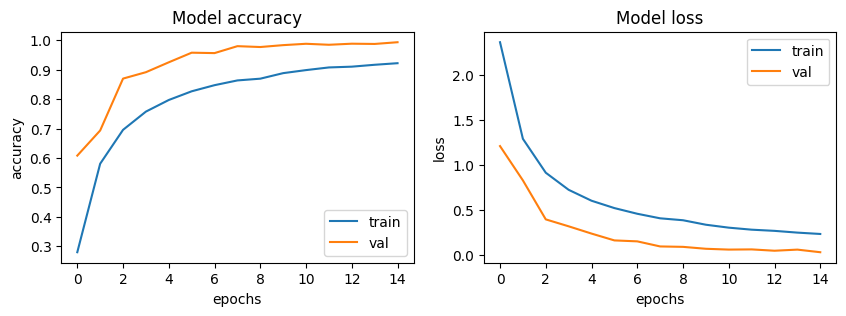

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.utils import to_categorical

# Load the Sign Language MNIST dataset
test_data = pd.read_csv('sign_mnist_test.csv')

# Separate labels and images
x_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

# Normalize the images
x_test = x_test / 255.0

# Reshape the images to 28x28x1
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_test = to_categorical(y_test, num_classes=25)

# Load the trained model
model = load_model('/content/sign_language_model.h5')

# Make predictions on the test set
predictions = model.predict(x_test)

# Get the class with the highest probability
predicted_classes = np.argmax(predictions, axis=1)

# Define the class names
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I',
               'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
               'U', 'V', 'W', 'X', 'Y']


225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


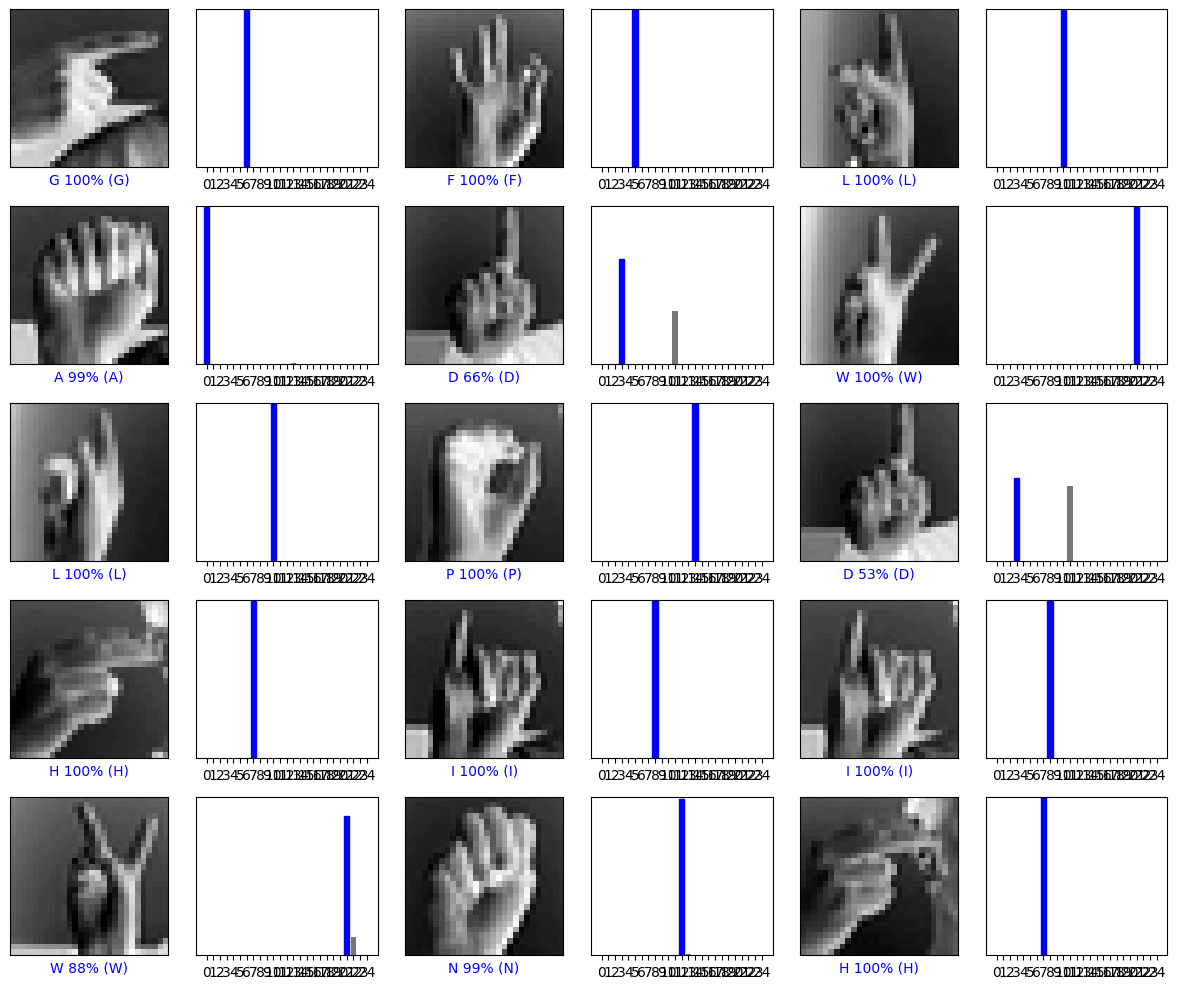

In [ ]:
# Function to plot an image along with the prediction
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.squeeze(), cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == np.argmax(true_label):
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[np.argmax(true_label)]),
               color=color)

# Function to plot the value array
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(25))
    plt.yticks([])
    thisplot = plt.bar(range(25), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[np.argmax(true_label)].set_color('blue')

# Plot some test images with their predictions
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, y_test, x_test)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, y_test)
plt.tight_layout()
plt.show()


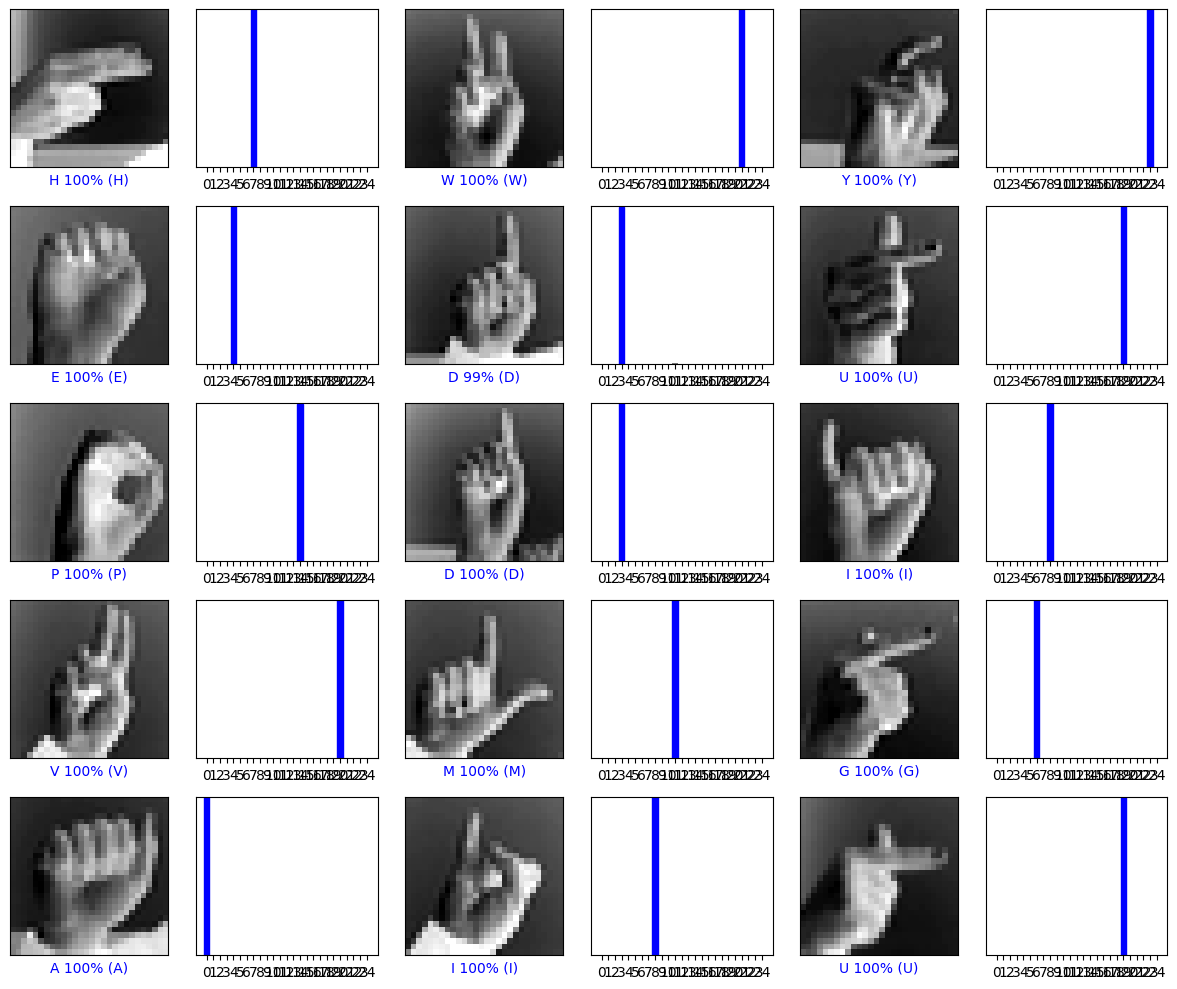

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot an image along with the prediction
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.squeeze(), cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    # Adjust predicted_label to be within the valid range of class_names
    predicted_label = min(predicted_label, len(class_names) - 1)

    if predicted_label == np.argmax(true_label):
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[np.argmax(true_label)]),
               color=color)

# Function to plot the value array
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(25))
    plt.yticks([])
    thisplot = plt.bar(range(25), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[np.argmax(true_label)].set_color('blue')

# Number of images to display
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

# Randomly select indices for the images to display
indices = np.random.choice(len(x_test), num_images, replace=False)

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i, index in enumerate(indices):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(index, predictions, y_test, x_test)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(index, predictions, y_test)
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import files
files.download('sign_language_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>